In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
# Load dataset (example using Iris dataset)
from sklearn.datasets import load_iris
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

In [3]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# Feature selection using f_classif (ANOVA F-value)
selector = SelectKBest(f_classif, k=2)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

In [6]:
# Feature encoding (if needed, for categorical features)
# For this example, let's create a dummy categorical feature
X_train_df = pd.DataFrame(X_train_scaled, columns=data.feature_names)
X_test_df = pd.DataFrame(X_test_scaled, columns=data.feature_names)
X_train_df['dummy_cat'] = np.random.choice(['A', 'B', 'C'], X_train_df.shape[0])
X_test_df['dummy_cat'] = np.random.choice(['A', 'B', 'C'], X_test_df.shape[0])

In [7]:
encoder = OneHotEncoder(sparse=False)
X_train_encoded = encoder.fit_transform(X_train_df[['dummy_cat']])
X_test_encoded = encoder.transform(X_test_df[['dummy_cat']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [8]:
# Concatenate encoded features back to the dataset
X_train_final = np.hstack([X_train_selected, X_train_encoded])
X_test_final = np.hstack([X_test_selected, X_test_encoded])

In [9]:
# Dimensionality reduction with PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_final)
X_test_pca = pca.transform(X_test_final)

In [10]:
# Dimensionality reduction with LDA
lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train_final, y_train)
X_test_lda = lda.transform(X_test_final)

In [11]:
# t-SNE for visualization (typically not used for training)
tsne = TSNE(n_components=2)
X_train_tsne = tsne.fit_transform(X_train_final)
# Note: t-SNE is used only for visualization, not for model training

In [12]:
# Model training and evaluation
model = RandomForestClassifier(random_state=42)
model.fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)

In [13]:
# Confusion Matrix and other metrics
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [14]:
# ROC Curve and AUC
y_pred_proba = model.predict_proba(X_test_pca)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)

In [15]:
# Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [16]:
# Printing results
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')
print(f'ROC AUC: {roc_auc}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Confusion Matrix:
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
Accuracy: 0.9666666666666667
Precision: 0.9694444444444444
Recall: 0.9666666666666667
F1-score: 0.9664109121909632
ROC AUC: 0.9947089947089947
Mean Squared Error: 0.03333333333333333
R-squared: 0.9523052464228935


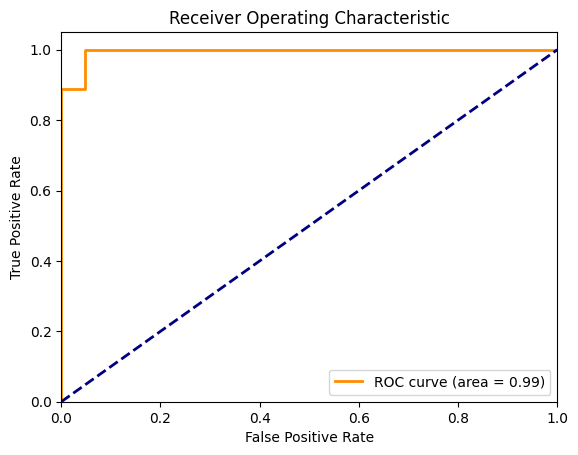

In [17]:
# Plotting the ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [18]:
# Hyperparameter tuning with GridSearchCV
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_pca, y_train)
print(f'Best parameters (GridSearchCV): {grid_search.best_params_}')

Best parameters (GridSearchCV): {'max_depth': None, 'n_estimators': 50}


In [19]:
# Hyperparameter tuning with RandomizedSearchCV
param_dist = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]}
random_search = RandomizedSearchCV(model, param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train_pca, y_train)
print(f'Best parameters (RandomizedSearchCV): {random_search.best_params_}')

Best parameters (RandomizedSearchCV): {'n_estimators': 100, 'max_depth': 30}
